In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import pandas_ta as pta
from yahoo_fin import stock_info as si
import seaborn as sns

/Users/yashsolanki/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [48]:
stocks = ["SPY", "GOOG", "AAPL", "RIVN"]
TOTAL_DAYS = 252
close_prices = []
for i in range(len(stocks)):
    df = si.get_data(stocks[i])
    close_vals = df['close'].to_list()
    close_vals = close_vals[len(close_vals) - TOTAL_DAYS: len(close_vals)]
    close_prices.append(close_vals)
    close_vals = []
    
close_prices = np.array(close_prices).T

In [49]:
portfolio_df = pd.DataFrame(close_prices, columns=[i for i in stocks])

In [51]:
portfolio_df.head()

,SPY,GOOG,AAPL,RIVN
0,411.220001,117.237999,147.960007,29.799999
1,401.440002,114.917999,142.639999,28.870001
2,389.799988,111.427498,137.130005,28.360001
3,375.000000,106.876503,131.880005,26.809999
4,373.869995,107.194000,132.759995,27.299999


## Getting the covariance matrix and the log returns of the portfolio

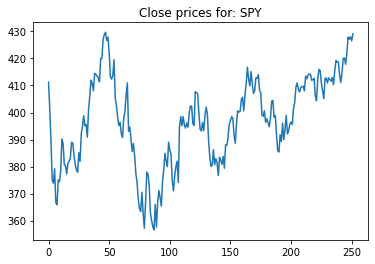

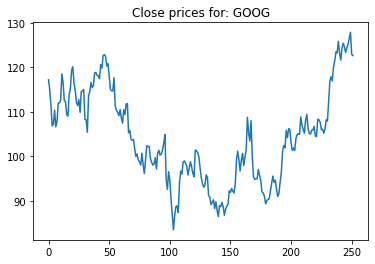

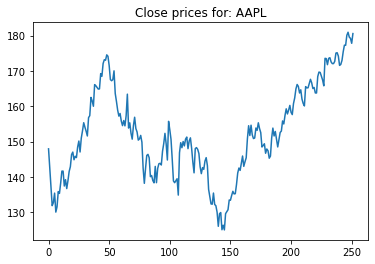

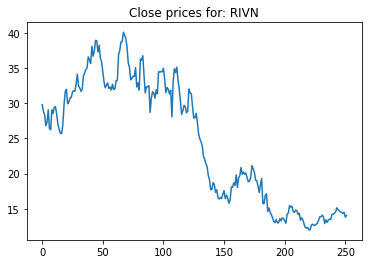

In [52]:
for i in portfolio_df.columns:
    plt.plot(portfolio_df[i])
    plt.title(f"Close prices for: {i}")
    plt.show()

In [53]:
log_returns = []
for i in portfolio_df.columns:
    stock_log_returns = np.log(portfolio_df[i]/portfolio_df[i].shift(1)).dropna().to_list()
    log_returns.append(stock_log_returns)

log_returns = np.array(log_returns).T
log_returns = pd.DataFrame(log_returns, columns=[i for i in portfolio_df.columns])

/Users/yashsolanki/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


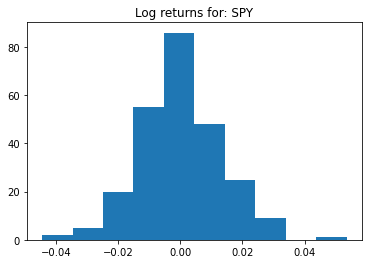

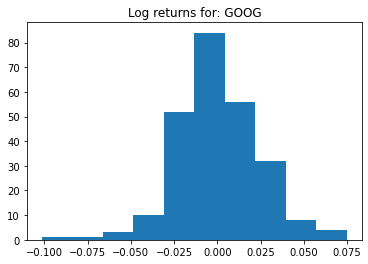

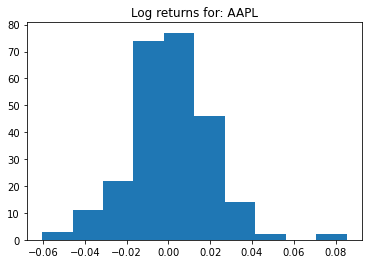

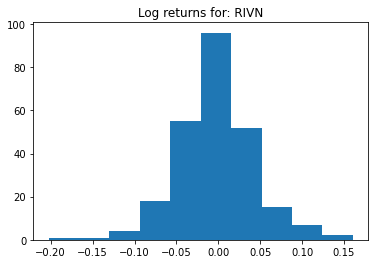

In [54]:
for i in log_returns.columns:
    plt.hist(log_returns[i])
    plt.title(f"Log returns for: {i}")
    plt.show()

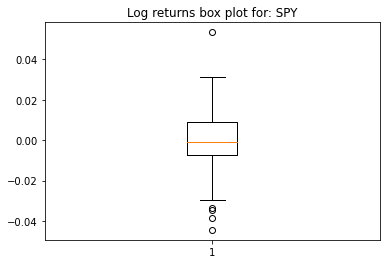

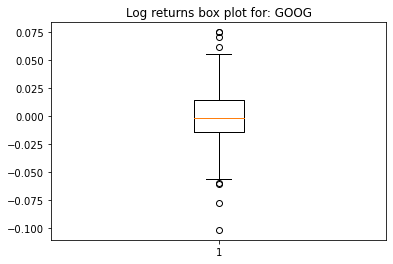

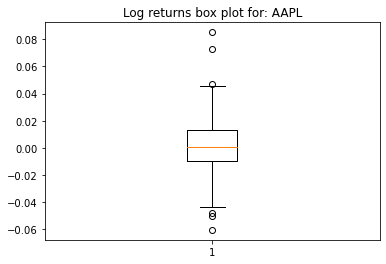

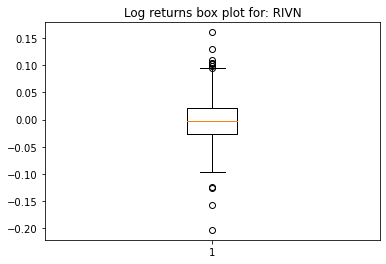

In [55]:
for i in log_returns.columns:
    plt.boxplot(log_returns[i])
    plt.title(f"Log returns box plot for: {i}")
    plt.show()

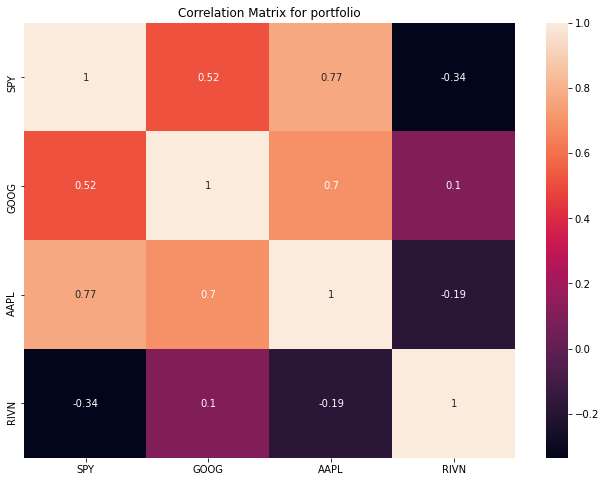

In [56]:
correlation_matrix = portfolio_df.corr()
fig = plt.figure(figsize=[11, 8])
ax = sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for portfolio")
plt.show()

## Calculation of volitality over a certain number of trading days 
Here the sqrt of the number of days is used because std is the square root of the variance and variance is generally proportional to time.

In [57]:
TRADING_DAYS = 60
close_prices_df = pd.DataFrame(close_prices, columns=[i for i in stocks])
# volitality = close_prices_df.rolling(TRADING_DAYS).std() * np.sqrt(TRADING_DAYS) (Use this with pct_change if not using logs)
volitality = log_returns.rolling(TRADING_DAYS).std() * np.sqrt(TRADING_DAYS)

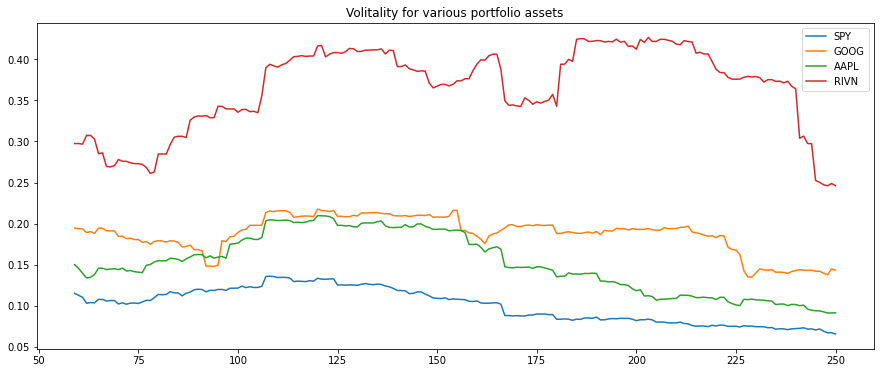

In [101]:
# for i in volitality.columns:
#     fig = plt.figure(figsize=(15, 4))
#     plt.plot(volitality[i])
#     plt.title(f"Volitality of {i} over {TRADING_DAYS} days as per returns")
#     plt.show()

volitality.plot(figsize=(15, 6))
plt.title("Volitality for various portfolio assets")
plt.show()

In [59]:
risk_free_return = 0

In [60]:
sharpe_ratio = (log_returns.rolling(TRADING_DAYS).mean() - risk_free_return) / volitality

# Annualized sharpe ratio = daily sharpe ratio * sqrt(total_days)
annualized_sharpe_ratio = ((log_returns.mean() - risk_free_return) / log_returns.std()) * np.sqrt(TOTAL_DAYS)

In [61]:
print("Annualized Sharpe ratio for the stocks in the portfolio")
for i in range(len(annualized_sharpe_ratio)):
    print(f"{stocks[i]} has a annualized sharpe ratio of: {annualized_sharpe_ratio[i]}")

Annualized Sharpe ratio for the stocks in the portfolio
SPY has a annualized sharpe ratio of: 0.20467022149036287
GOOG has a annualized sharpe ratio of: 0.11960862127340098
AAPL has a annualized sharpe ratio of: 0.6464193989060342
RIVN has a annualized sharpe ratio of: -1.0494696813149447


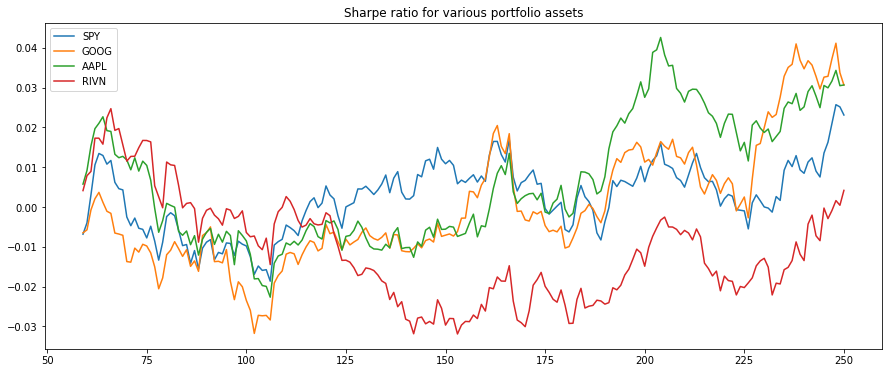

In [100]:
# for i in sharpe_ratio.columns:
#     fig = plt.figure(figsize=(15, 4))
#     plt.plot(sharpe_ratio[i])
#     plt.title(f"Sharpe ratio of {i} over {TRADING_DAYS} days as the len of mean")
#     plt.show()

sharpe_ratio.plot(figsize=(15, 6))
plt.title("Sharpe ratio for various portfolio assets")
plt.show()

## Calculation of the sortino ratio for the individual stocks of the portfolio

In [63]:
downside_volitality = log_returns[log_returns < 0].rolling(TRADING_DAYS, center=True, min_periods=10).std() * np.sqrt(TRADING_DAYS)
sortino_ratio = (log_returns.rolling(TRADING_DAYS).mean() - risk_free_return) / downside_volitality
annualized_sortino_ratio = ((log_returns.mean() - risk_free_return) / downside_volitality.std()) * np.sqrt(TOTAL_DAYS)

In [64]:
print("Annualized Sortino ratio for the stocks in the portfolio")
for i in range(len(annualized_sortino_ratio)):
    print(f"{stocks[i]} has a annualized Sortino ratio of: {annualized_sharpe_ratio[i]}")

Annualized Sortino ratio for the stocks in the portfolio
SPY has a annualized Sortino ratio of: 0.20467022149036287
GOOG has a annualized Sortino ratio of: 0.11960862127340098
AAPL has a annualized Sortino ratio of: 0.6464193989060342
RIVN has a annualized Sortino ratio of: -1.0494696813149447


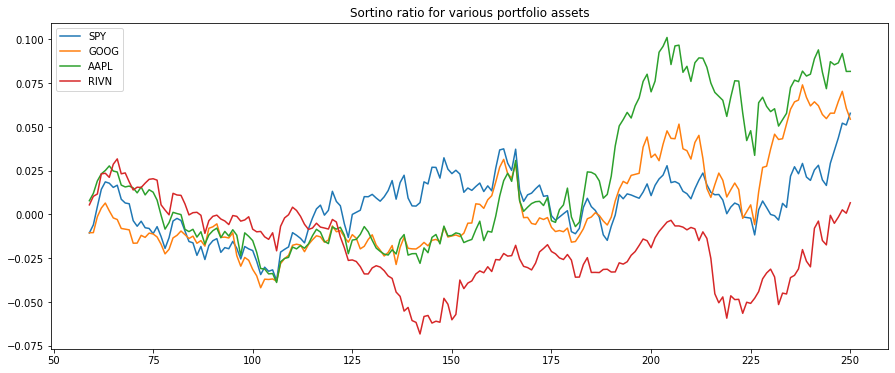

In [102]:
# for i in sortino_ratio.columns:
#     fig = plt.figure(figsize=(15, 4))
#     plt.plot(sortino_ratio[i])
#     plt.title(f"Sortino ratio of {i} over {TRADING_DAYS} days as the len of mean")
#     plt.show()


sortino_ratio.plot(figsize=(15, 6))
plt.title("Sortino ratio for various portfolio assets")
plt.show()

## Calculating the M2 ratio 

In [83]:
BENCHMARK = 'SPY'
benchmark_volitality = volitality[BENCHMARK]
m2_ratios = pd.DataFrame()
for i in log_returns.columns:
    if i != BENCHMARK:
        m2_ratio = sharpe_ratio[i] * benchmark_volitality + risk_free_return
        m2_ratios[i] = m2_ratio

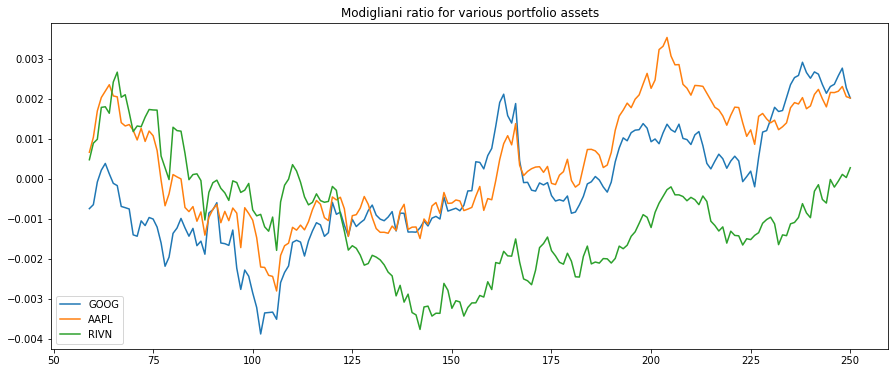

In [103]:
m2_ratios.plot(figsize=(15, 6))
plt.title("Modigliani ratio for various portfolio assets")
plt.show()

## Calculating the Efficient Frontier in order to determine portfolio weightings for diversification

In [104]:
num_assets = len(stocks)